## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../../Datasets/wine_quality_red-clean.csv', index_col=0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
sns.displot(df["alcohol	"])

KeyError: 'alcohol\t'

In [5]:
df['relative_velocity.kilometers_per_second'].sample(n=20, replace=False)

304    10.551520
10      7.636334
324     5.279470
51     11.173874
207    16.478179
303    17.564908
94     26.246432
32     18.113985
250    17.455279
200     7.707831
256    11.217348
219     6.244368
71      3.799835
171     6.972576
183    21.787288
97     15.980210
274    33.931711
184    17.371245
300     7.164148
188     8.390497
Name: relative_velocity.kilometers_per_second, dtype: float64

In [6]:
velrel = df['relative_velocity.kilometers_per_second']

means = []

for i in range(100_000):
    sample = velrel.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)
sns.distplot(serie_means, kde=False, norm_hist=False);

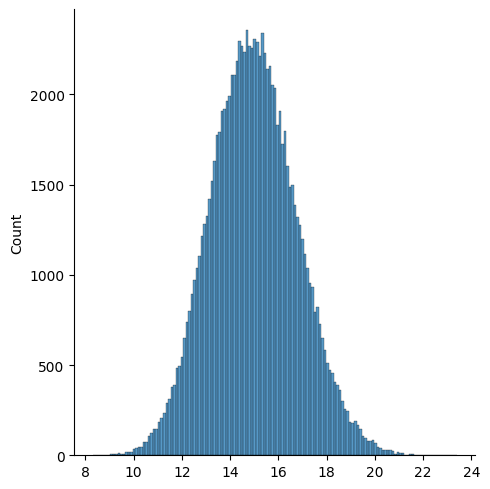

In [15]:
sns.displot(serie_means);

In [10]:
serie_means.skew()
serie_means.kurtosis()
print("Asimetria: "+serie_means.skew()+" /nKurtosis "+serie_means.kurtosis())

TypeError: can only concatenate str (not "numpy.float64") to str

C:\Users\eleri\AppData\Local\Temp\ipykernel_55060\3070165583.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


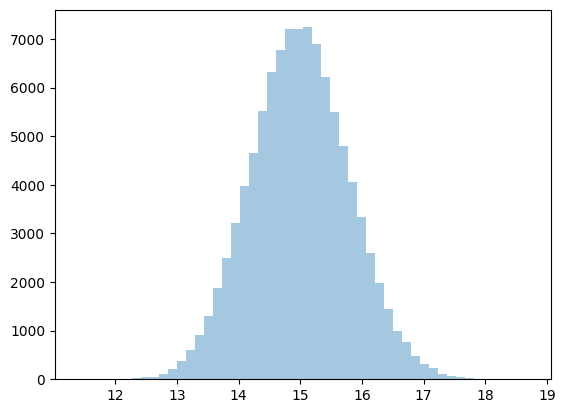

In [8]:
velrel = df['relative_velocity.kilometers_per_second']

means = []

for i in range(100_000):
    sample = velrel.sample(n=100, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)
sns.distplot(serie_means, kde=False, norm_hist=False);

C:\Users\eleri\AppData\Local\Temp\ipykernel_55060\3979964086.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


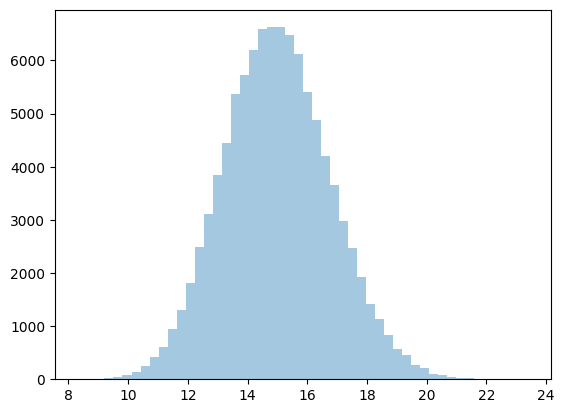

In [9]:
velrel = df['relative_velocity.kilometers_per_second']

means = []

for i in range(100_000):
    sample = velrel.sample(n=20, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)
sns.distplot(serie_means, kde=False, norm_hist=False);